In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
train_data = 'GRU/portfolio_weights_GRU_no_prob_sharpe_ratio_train.csv'
test_data = 'GRU/portfolio_weights_GRU_no_prob_sharpe_ratio.csv'

# Train 데이터 전처리
train_df = pd.read_csv(train_data, index_col=0)
train_df.index = pd.to_datetime(train_df.index)

# Test 데이터 전처리 
test_df = pd.read_csv(test_data, index_col=0) 
test_df.index = pd.to_datetime(test_df.index)

# 20 거래일 간격으로 인덱스 생성
train_indices = np.arange(0, len(train_df), 20)
test_indices = np.arange(0, len(test_df), 20)

train_df = train_df.iloc[train_indices]
test_df = test_df.iloc[test_indices]

# 소수점 4자리 이하는 버림
train_df = train_df.round(3)
test_df = test_df.round(3)

# 0이 아닌 칼럼만 선택
train_df = train_df.loc[:, (train_df != 0).any()]
test_df = test_df.loc[:, (test_df != 0).any()]

train_df

,AAPL,ADSK,AIZ,ALGN,ANSS,AYI,BKNG,BMY,CBRE,CCI,...,SIG,SLG,TPR,TSCO,VFC,VLO,VMC,WDC,WMB,WYNN
2001-03-29,0.052,0.0,0.0,0.04,0.00,0.0,0.061,0.0,0.00,0.00,...,0.0,0.00,0.047,0.0,0.0,0.04,0.0,0.0,0.051,0.056
2001-04-27,0.052,0.0,0.0,0.00,0.04,0.0,0.061,0.0,0.00,0.04,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.055
2001-05-25,0.052,0.0,0.0,0.04,0.00,0.0,0.061,0.0,0.00,0.00,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056
2001-06-25,0.052,0.0,0.0,0.00,0.00,0.0,0.061,0.0,0.04,0.00,...,0.0,0.04,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056
2001-07-24,0.052,0.0,0.0,0.00,0.04,0.0,0.061,0.0,0.00,0.00,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-14,0.052,0.0,0.0,0.00,0.04,0.0,0.061,0.0,0.04,0.00,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056
2012-07-13,0.052,0.0,0.0,0.00,0.04,0.0,0.061,0.0,0.00,0.04,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056
2012-08-10,0.052,0.0,0.0,0.00,0.04,0.0,0.061,0.0,0.04,0.04,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056
2012-09-10,0.052,0.0,0.0,0.04,0.04,0.0,0.061,0.0,0.00,0.04,...,0.0,0.00,0.047,0.0,0.0,0.00,0.0,0.0,0.051,0.056


<Axes: >

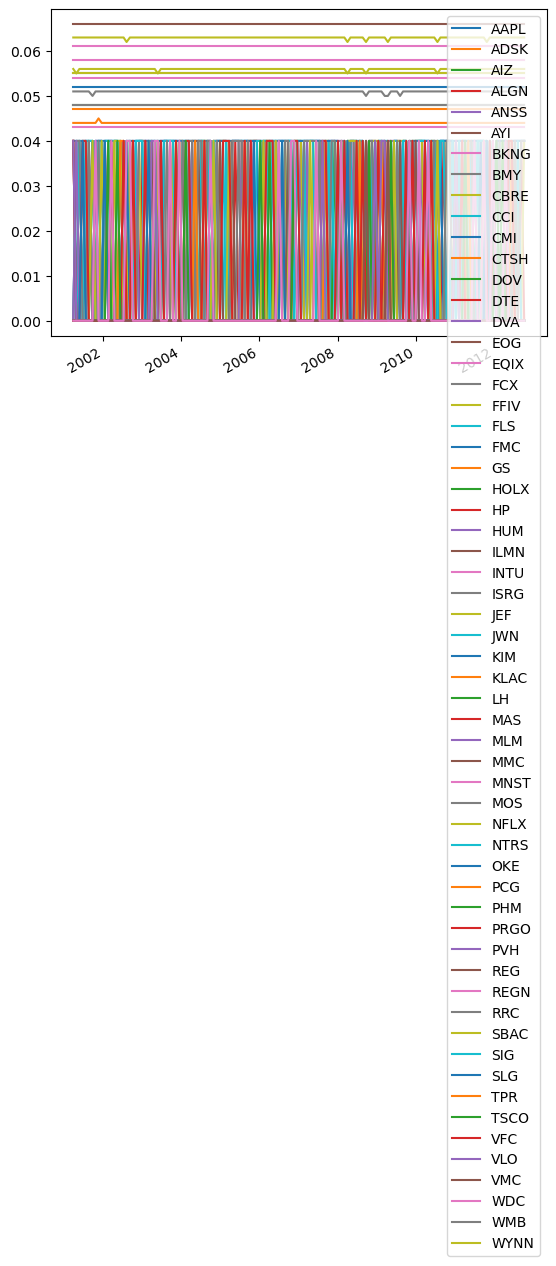

In [65]:
train_df.plot(kind='line')

<Axes: >

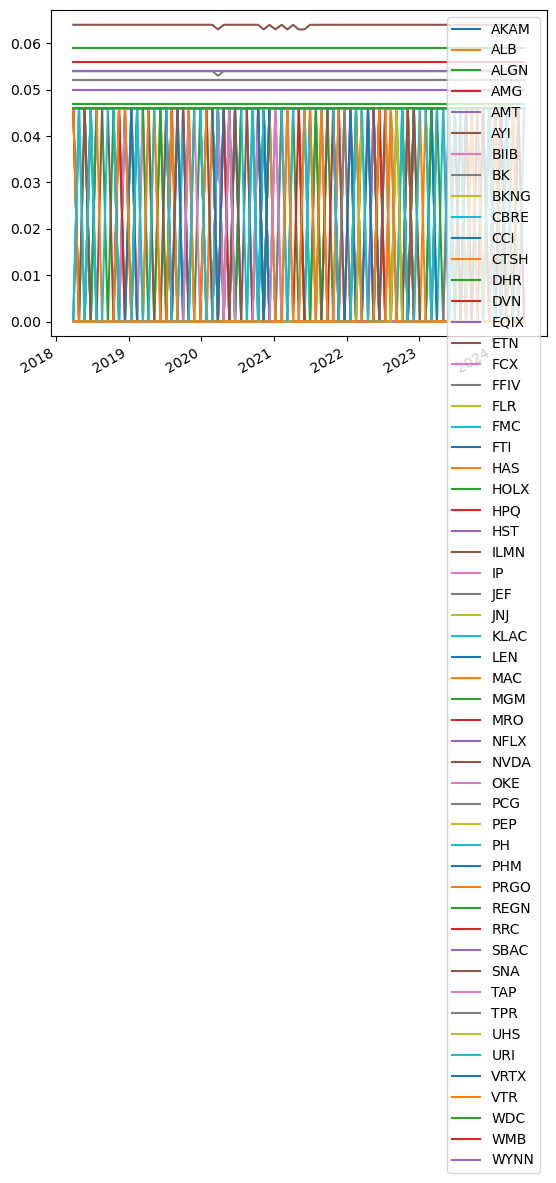

In [66]:
test_df.plot(kind='line')

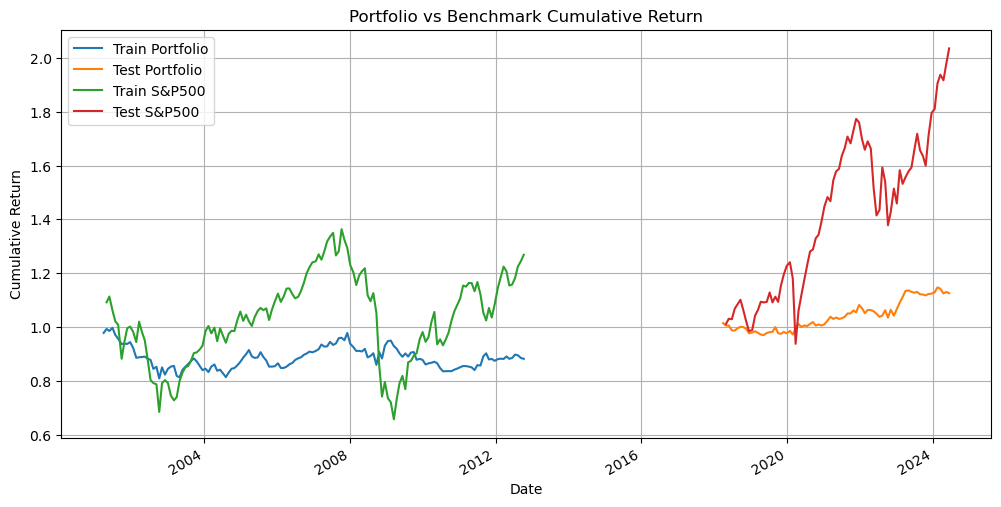

In [67]:
return_path = '../../Data/processed/return_df.csv'
benchmark_path = '../../Data/processed/snp500_index.csv'
return_df = pd.read_csv(return_path, index_col=0)
return_df.index = pd.to_datetime(return_df.index)
benchmark_df = pd.read_csv(benchmark_path, index_col=0)
benchmark_df.index = pd.to_datetime(benchmark_df.index)

# Train/Test 데이터 각각에 대해 return_df와 benchmark_df 재정렬
train_return_df = return_df.reindex(train_df.index)
test_return_df = return_df.reindex(test_df.index)
train_benchmark_df = benchmark_df.reindex(train_df.index)
test_benchmark_df = benchmark_df.reindex(test_df.index)

# Train 포트폴리오 수익률 계산
train_portfolio_return = (train_df * train_return_df).sum(axis=1)
train_portfolio_cumulative = (1 + train_portfolio_return).cumprod()

# Test 포트폴리오 수익률 계산
test_portfolio_return = (test_df * test_return_df).sum(axis=1)
test_portfolio_cumulative = (1 + test_portfolio_return).cumprod()

# 벤치마크(S&P500) 수익률 계산
train_benchmark_return = train_benchmark_df['Close'].pct_change()
train_benchmark_cumulative = (1 + train_benchmark_return).cumprod()
test_benchmark_return = test_benchmark_df['Close'].pct_change()
test_benchmark_cumulative = (1 + test_benchmark_return).cumprod()

# 포트폴리오 vs 벤치마크 누적 수익률 그래프
plt.figure(figsize=(12, 6))
train_portfolio_cumulative.plot(label='Train Portfolio')
test_portfolio_cumulative.plot(label='Test Portfolio')
train_benchmark_cumulative.plot(label='Train S&P500')
test_benchmark_cumulative.plot(label='Test S&P500')
plt.title('Portfolio vs Benchmark Cumulative Return')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()